# 刘二大人pytorch教程  
## 线性模型  
假设a为tensor类型，则a包括data和grad同时进行更新（使用计算图）  
如果当期tensor更新不加入计算图，则使用a.data进行更新，a.item获得标量值  
**最终的损失值要变成标量，否则无法使用backward**

### 穷举法

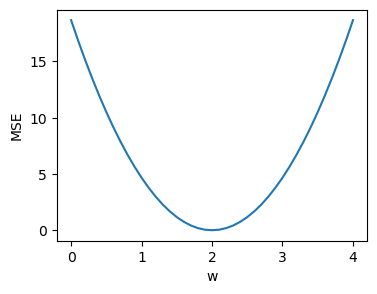

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

def forward(x, w):
    return x*w

def loss(x, y, w):
    y_pred = forward(x, w)
    return (y_pred - y) * (y_pred - y)

w_list = []
mse_list = []
# 穷举法
for w in np.arange(0.0, 4.1, 0.1):
    # print('w = ', w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val, w)
        loss_val = loss(x_val, y_val, w)
        l_sum += loss_val
       # print('\t', x_val, y_val, y_pred_val, loss_val)
    # print('MSE=', l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)

plt.figure(figsize=(4, 3))
plt.plot(w_list, mse_list)
plt.xlabel('w')
plt.ylabel('MSE')
plt.show()

### 随机梯度下降

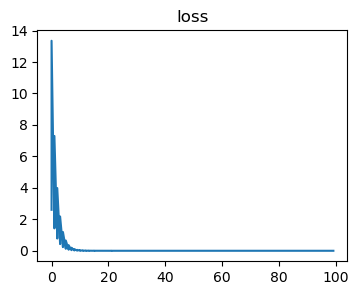

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 简单线性回归
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = np.random.rand()

def f(x):
    return x*w

def loss(x, y):
    y_pred = f(x)
    return (y_pred - y) * (y_pred - y)

def gradient(x, y):
    return 2*x*(x*w - y)
# 随机梯度下降
xx = []
yy = []

for epoch in range(100):
    for x, y in zip(x_data, y_data):
        grad = gradient(x, y)
        w = w - 0.01 * grad
        # print("w=", w, "loss=", loss(x, y))
        l = loss(x, y)
        xx.append(epoch)
        yy.append(l)

plt.figure(figsize=(4, 3))
plt.plot(xx, yy)
plt.title('loss')
plt.show()

### 使用pytorch的backward

w: 1.1582062244415283 --- b: 0.7414597868919373
w: 2.764730930328369 --- b: 1.4705381393432617
w: 2.8074605464935303 --- b: 1.3850793838500977
w: 2.8541629314422607 --- b: 1.2916743755340576
w: 2.9040627479553223 --- b: 1.191874623298645
w: 2.8883330821990967 --- b: 1.1217504739761353
w: 2.9947235584259033 --- b: 1.1005167961120605
w: 2.9737675189971924 --- b: 1.0635098218917847
w: 2.969266891479492 --- b: 1.0460999011993408
w: 2.983152389526367 --- b: 1.0336952209472656


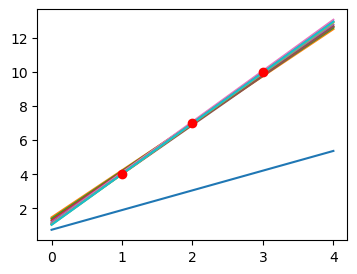

最终w: 2.9873459339141846 最终b: 1.0265507698059082


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import random

x_data = [1.0, 2.0, 3.0]
y_data = [4.0, 7.0,  10.0]

w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
n = 0.1

plt.figure(figsize=(4, 3))
def forward(x):
    return w*x + b

def loss(x, y):
    y_hat = forward(x)
    return (y_hat - y)**2
def show(w_val, b_val):
    x = np.linspace(0, 4, 100)
    y = w_val*x + b_val
    plt.plot(x, y)

for epoch in range(100):
    i = random.randint(0, 2)
    x = x_data[i]
    y = y_data[i]
    loss_val = loss(x, y)
    loss_val.backward()
    w.data = w.data - n*w.grad.data
    w.grad.data.zero_()
    b.data = b.data - n*b.grad.data
    b.grad.data.zero_()
    # 只在每隔10次迭代后调用show函数
    if epoch % 10 == 0:
        show(w.item(), b.item())
        print(f'w: {w.item()} --- b: {b.item()}')
plt.plot(x_data, y_data, ls = 'None', marker = 'o', c = 'r')
plt.show()
print(f'最终w: {w.item()} 最终b: {b.item()}')

### 线性回归pytorch实现

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import random

x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

class  LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    # print(epoch, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w=', model.linear.weight.item())
print('b=', model.linear.bias.item())

x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print('y_pred=', y_test.data)

w= 1.6915091276168823
b= 0.7012720704078674
y_pred= tensor([[7.4673]])
